Visualize Bounding Boxes and Class Labels
-----------------------------------------

... through a JSON file containing output detections/ground truth annotations in COCO format.  
This file typically comes from `scripts/extract_boxes_tf.py`.

**Usage Instructions:**

- Change the paths of `IMAGES_DIRPATH` and `DETECTIONS_JSONPATH` in first cell, as per your needs.
- Change the variable `RANDOM_IMAGE_INDEX` in second cell to use any other image from the split.
- Change the variable `CONFIDENCE_THRESHOLD` in second cell to control the number of boxes to be visualized.

In [1]:
%matplotlib inline
import json
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Path to a directory containing images of a particular split.
# Typically this split could be one of {coco_train2017, coco_val2017, nocaps_val, nocaps_test}.
IMAGES_DIRPATH = "/datasets/nocaps/images/val"

# Path to a JSON file containing output detections from `scripts/extract_boxes_tf.py`
# This could also be any of the ground truth bounding box (instances) annotations (in COCO format).
DETECTIONS_JSONPATH = "/outputs/detections.json"

# Must contain fields as COCO bounding box annotations: {"categories", "images", "annotations"}
detections_json = json.load(open(DETECTIONS_JSONPATH))

# Keep a map of class ID to class name for picking class names during visualization.
class_names_map = {c["id"]: c["name"] for c in detections_json["categories"]}

In [2]:
# This is NOT the Image ID, this is index of Image ID in the "images" list.
# So this could be any number between 0 - (`len(detections_json["images"]) - 1`).
RANDOM_IMAGE_INDEX = 7

# Select a confidence threshold to restrict the number of boxes (to avoid clutter).
CONFIDENCE_THRESHOLD = 0.5

# Get the image ID and file name from annotations.
image_id = detections_json["images"][RANDOM_IMAGE_INDEX]["id"]
image_filename = detections_json["images"][RANDOM_IMAGE_INDEX]["file_name"]
print("IMAGE ID: ", image_id)

IMAGE ID:  7


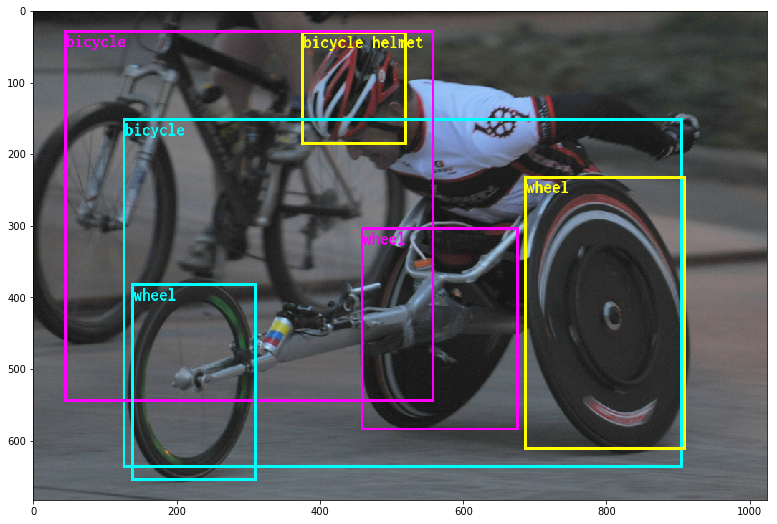

In [3]:
# Instantiate an image instance, draw context and a TTF font for displying class names.
image = Image.open(os.path.join(IMAGES_DIRPATH, image_filename)).convert("RGB")
image_draw = ImageDraw.Draw(image)
font = ImageFont.truetype("assets/Inconsolata-Bold.ttf", size=24)

# Get box annotations for this particular image ID.
box_annotations = [ann for ann in detections_json["annotations"] if ann["image_id"] == image_id]

# Use `.get("score", 1)` because "score" may not be available (in GT annotations).
boxes = [ann["bbox"] for ann in box_annotations if ann.get("score", 1) >= CONFIDENCE_THRESHOLD]
class_ids = [ann["category_id"] for ann in box_annotations if ann.get("score", 1) >= CONFIDENCE_THRESHOLD]

for i, (box, class_id) in enumerate(zip(boxes, class_ids)):

    # Visualize in different colors for clarity.
    color = "yellow" if i % 3 == 0 else "cyan" if i % 3 == 1 else "magenta"

    image_draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=color, width=4)
    image_draw.text((box[0] + 3, box[1] + 3), text=class_names_map[class_id], font=font, fill=color)

plt.figure(figsize=(16,9))
plt.imshow(np.asarray(image))